### Fill out:
Name & Surname: Fatimah Ayub

Student ID: 34602291

## W1&W2 post studio exercises (revision, kNN)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to answer the questions stated in the exercises in markdown cell. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

For these exercises you will use the `penguins` dataset from seaborn. Load it using load_dataset().

In [6]:
# as there were warnings about future changes so far non-affecteing our calculations - we'll import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Exercise 1 (cleaning, plotting)

First, create a numerical code for classification rather than using the string value of `species` (add column named, e.g., `code`). 

We will be using columns `flipper length`, `bill depth`, `species`, `code`; drop rows that have at least one missing value in any of these columns. Hint: dropna() and play around with its parameters such as subset etc.

Next, create:

- a feature array which consists of the `flipper length` and `bill depth` (**show first 5 rows**), 

- a target (i.e., Y or outcome) series which consists of the species `code` (**show first 5 values**),

- and an array which contains unique values of species names (**show all**). 

Also, **plot a scatter plot** of the feature array against the target series (include legend). Hint: Plot flipper length against bill depth and colour according to `target series` - label will have 3 levels: 0,1,2. If you would like scatterplot with species names - use penguins column `species`.)

Feature array (first 5 rows):
 [[181.   18.7]
 [186.   17.4]
 [195.   18. ]
 [193.   19.3]
 [190.   20.6]]
Target series (first 5 values):
 [0 0 0 0 0]
Unique species names:
 ['Adelie' 'Chinstrap' 'Gentoo']


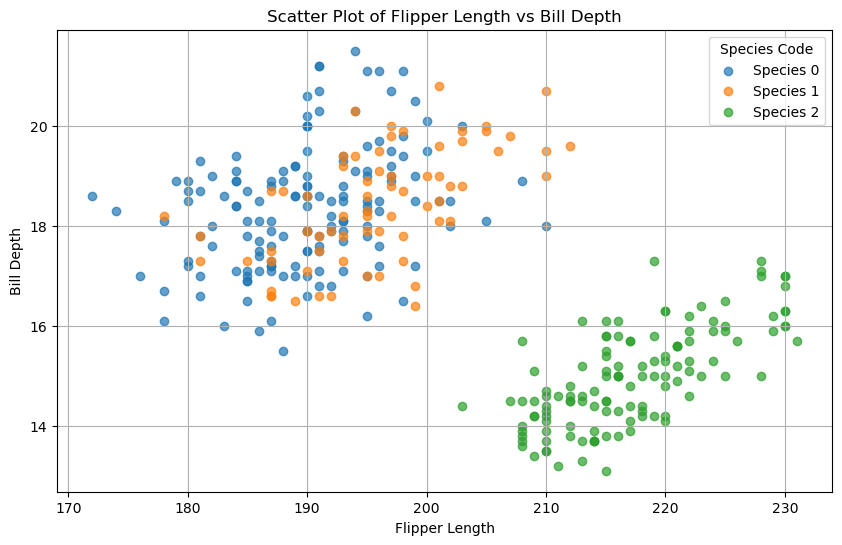

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd

penguins = sns.load_dataset('penguins') # load the dataset from seaborn
penguins['code'] = pd.Categorical(penguins['species']).codes
penguins_clean = penguins.dropna(subset=['flipper_length_mm', 'bill_depth_mm', 'species', 'code']) #using .dropna to remove Not A Number (NaN) values 
X = penguins_clean[['flipper_length_mm', 'bill_depth_mm']].values
y = penguins_clean['code'].values

print("Feature array (first 5 rows):\n", X[:5])
print("Target series (first 5 values):\n", y[:5])

#get unique species values
unique_species = penguins_clean['species'].unique()
print("Unique species names:\n", unique_species)

#creating the scatter plot of the array
plt.figure(figsize=(10, 6))
for species_code in sorted(penguins_clean['code'].unique()):
    subset = penguins_clean[penguins_clean['code'] == species_code]
    plt.scatter(subset['flipper_length_mm'], subset['bill_depth_mm'], label=f'Species {species_code}',alpha = 0.7)

plt.xlabel('Flipper Length')
plt.ylabel('Bill Depth')
plt.title('Scatter Plot of Flipper Length vs Bill Depth')
plt.legend(title='Species Code')
plt.grid()
plt.show()

### Exercise 2 (kNN - raw data)

Split the data into training and testing set, with and 80:20 split, random state equal to 0. Create a kNN model with 10 nearest neighbours and uniform weights. Train (fit) model on training data. Calculate predictions for feature values in testing set (**show first 5 entries**). **Print accuracy** (import from sklearn.metrics) and **plot confusion matrix** using function from the pre-studio notebook.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

penguins = sns.load_dataset('penguins') # load the dataset from seaborn
penguins['code'] = pd.Categorical(penguins['species']).codes
penguins_clean = penguins.dropna(subset=['flipper_length_mm', 'bill_depth_mm', 'species', 'code'])
X = penguins_clean[['flipper_length_mm', 'bill_depth_mm']].values
y = penguins_clean['code'].values

#'X' is the feature array and 'y' is the target series
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

np.sqrt(X_train.shape[0])

knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred.shape
y_test.shape

print("First 5 predictions:", y_pred[:5])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#confusion matrix
confusion_matrix(y_test, y_pred)

First 5 predictions: [0 2 1 2 0]
Accuracy: 0.7536231884057971


array([[28,  8,  0],
       [ 9,  3,  0],
       [ 0,  0, 21]])

### Exercise 3 (normalisation, plotting)

Our features have quite different variance. Let's see, whether accuracy of kNN model can improve by normalising the the feature array. Divide data in feature array by its standard deviation, **show first 5 rows** and **plot scatterplot of flipper length against bill_depth coloured according to code (or species).**

In [40]:
X.std() #calculating standard deviation in order to normalise the data

92.42741024553254

   flipper_length_mm  bill_depth_mm
0          -1.418347       0.785449
1          -1.062250       0.126188
2          -0.421277       0.430462
3          -0.563715       1.089724
4          -0.777373       1.748985


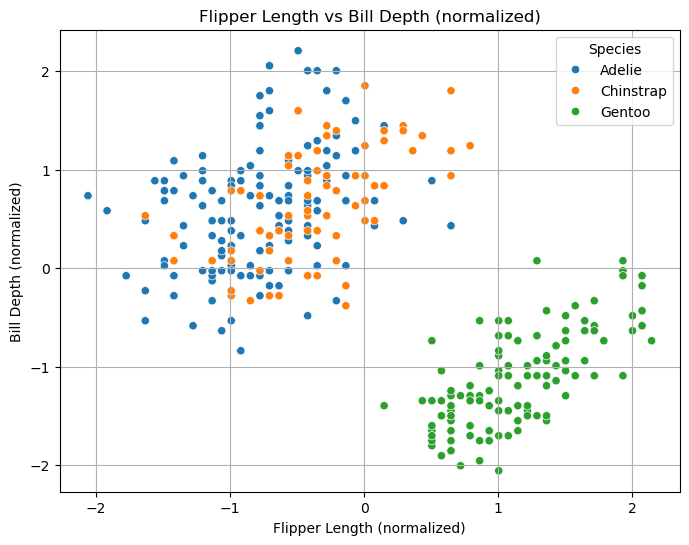

In [42]:
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

print(pd.DataFrame(Xn,columns=['flipper_length_mm', 'bill_depth_mm']).head())

n_neighbours = 16
clf = KNeighborsClassifier(n_neighbours, weights='uniform')
clf.fit(Xn, y)

plt.figure(figsize=((8, 6)))
sns.scatterplot(x=Xn[:, 0], y=Xn[:, 1], hue=penguins_clean['species'])
plt.xlabel('Flipper Length (normalized)')
plt.ylabel('Bill Depth (normalized)')
plt.title('Flipper Length vs Bill Depth (normalized)')
plt.legend(title='Species')
plt.grid()
plt.show()

### Exercise 4 (kNN - normalised data)

Repeat Ex 2 on normalised data created in Ex 3. **Show accuracy score, plot confusion matrix. Did the accuracy score improve?**

In [111]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xn_train,y_train)
    pred_i = knn.predict(Xn_test)
    error_rate.append(np.mean(pred_i != y_test))
accuracy_score(y_test, y_pred)

0.7391304347826086

In [113]:
y_pred = knn.predict(Xn_test)
y_pred.shape
y_test.shape

confusion_matrix(y_test, y_pred)

array([[29,  7,  0],
       [ 9,  3,  0],
       [ 0,  0, 21]])